In [6]:
import numpy as np
import sympy as sp
import pickle
from IPython.display import HTML, Image
import ipywidgets as widgets
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.rcParams['legend.fontsize'] = 10
import pandas as pd
import itertools
pd.set_option('display.max_colwidth', None)
import treelib as tr

#

# function to print latex
def renderListToLatex(e):
    latex_rendering = []

    for i in range(len(e)):
        latex_rendering.append("$$" + sp.latex(e[i]) + "$$<br/>")
    
    return(HTML("".join(latex_rendering[0:])))

<i>Note: SP 17 is an exploration of Knuth, Chapter 7, have put somewhere else </i>

### Solving Polynomial Equations (18)

<hr/>

<b>Aim</b>: Understand the formal object that is a sum of all polygons with all of their subdivisions into triangles
<hr/>

Let $F1$ for a function that implements $C$.

In [4]:
def F1(m2, m3, returnCoefficientsOnly = False, returnCoefficientsOnlyWithoutSigns = True, returnCoefficientsAsFactorialStrings = False):
    c_0, c_1, c_2, c_3 = sp.symbols('c_0, c_1, c_2, c_3')
    s1 = (-1)**(m3 + 1)
    s2 = sp.factorial(2 * m2 + 3 * m3)
    s3 = sp.factorial(1 + m2 + 2 * m3) * sp.factorial(m2) * sp.factorial(m3)

    
    s4 = c_0**(1 + m2 + 2 * m3) * c_2**m2 *c_3**m3
    s5 = c_1**(2 * m2 + 3 * m3 + 1)
    
    s7 = str(2 * m2 + 3 * m3) + "!"
    s8 = str(1 + m2 + 2 * m3) + "!" + str(m2) + "!"  + str(m3) + "!"
    
    if returnCoefficientsOnly:
        s6 = s1 * (s2 / s3)
    elif returnCoefficientsOnlyWithoutSigns:
        s6 = (s2 / s3)
    elif returnCoefficientsAsFactorialStrings:
        s6 = str(s7 + " | " + s8)
    else:
        s6 = s1 * (s2 / s3) * (s4 / s5)

    return(s6)

Let $P3$ be a matrix of values retlating the part of the formula that calculates unsigned coefficients: $ \frac{(2 m_{2} + 3 m_{3})!}{(1 + m_{2} + 2 m_{3})!m_2!m_3!}$ 

In [5]:
P1 = np.arange(8)
P2 = np.array([[F1(j, i) for i in P1] for j in P1])
P3 = sp.Matrix(P2)
P3

Matrix([
[  1,     1,      3,      12,        55,        273,        1428,         7752],
[  1,     5,     28,     165,      1001,       6188,       38760,       245157],
[  2,    21,    180,    1430,     10920,      81396,      596904,      4326300],
[  5,    84,    990,   10010,     92820,     813960,     6864396,     56241900],
[ 14,   330,   5005,   61880,    678300,    6864396,    65615550,    600900300],
[ 42,  1287,  24024,  352716,   4476780,   51482970,   551170620,   5588372790],
[132,  5005, 111384, 1899240,  27457584,  354323970,  4206302100,  46835886240],
[429, 19448, 503880, 9806280, 159352050, 2283421140, 29804654880, 361913666400]])

<b>Observe</b>: It is possible to create operations such as addition and multiplication on newly defined types

<b>Let</b> $P$ be an ongoing  sum of the of polygons of increasing sizes arrangeed in different combinations of triangles, expressed as

$$ P = | + P   \bar{\triangledown} P $$

<b>Observe</b>: Note the $|$ operator here represents a 1-gon and the $\bar{\triangledown}$ operator is yet to be defined

<b>Ref</b>: This is taken from Concrete Mathematics (Ex. 22, Ch7) as part of a question to devise a new operation to explain the relationship between the solutions to a polynomial equation and the subdivisions of a polygon. 

<b>Observe</b>: This conjecture introduces both a new type, $P$, and a new operation, $\triangledown$


<b>Observe</b>: This conjecture deals with the sum of the number of ways of subdividing a 2-gon into triangles + the the number of ways to subdivide a 3 gon into triangles + the number of ways ot subdivide a 4-gon into triangles and so on. 

<b>Observe</b>: A way to make sense of this is take a multiset point of view

<b>Definition</b>:  A Multiset is a data structure, part of the different available data structures including lists, ordered lists, multisets and sets. 


<b>Definition</b>:   Consider the following example: 

1. Let F1 be a 5-gon with a distinguisd edge, subdivided in triangles
2. Let F1 be a 6-gon with a distinguised edge, subdivied in triangles
3. Join the distinguised top of the two polygons join to the free edges of the $\bar{\triangledown}$ operator.

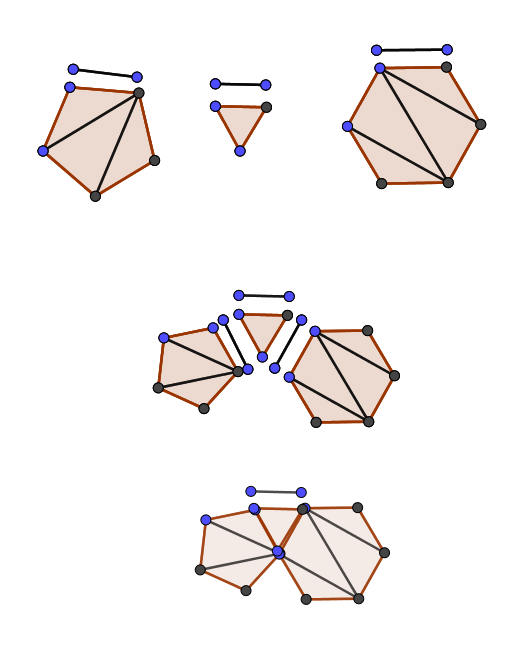

In [7]:
Image("./Images/SP18_1.PNG")

<b>Observe</b>: This creates an 10-gon. Note the distinguised (top) edges get glued to the free edges of $\bar{\triangledown}$. 

<b>Observe</b> $\bar{\triangledown}$ is a multiplication with a trianglular subdivision and distinguised top edges



<b>Aim</b>: Create a rooted planar tree version of this

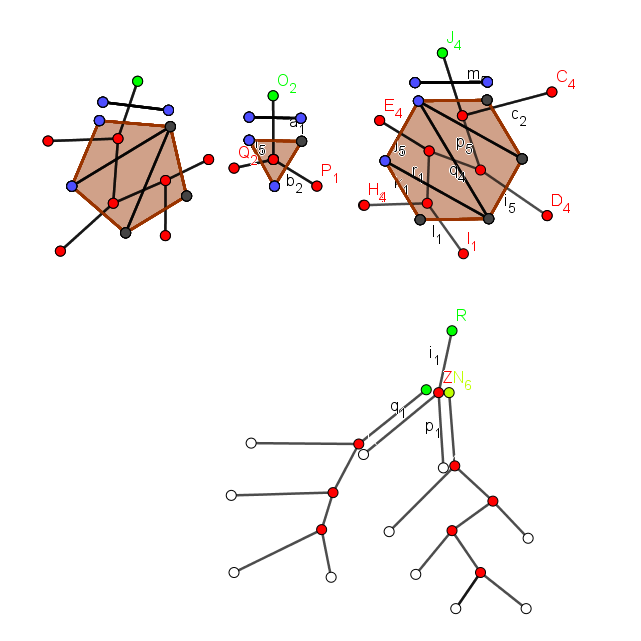

In [10]:
Image("./Images/SP18_2.PNG")

<b>Observe</b>: The trees can be joined to the existing edges of the $\bar{\triangledown}$ operator which is represented as the top tree with root $R$

<b>Observe</b>: Recall the above conjecture: 

$$ P = | + P   \bar{\triangledown} P $$



<b>Observe</b>: For a polygon with that an be subdived by traingles with distinsuished top edge, there can be seen a distinguised interior triangle with that top edge (seen in the $\bar{\triangledown}$ operator. 

<b>Observe</b>: Every polygon that can be subdivided into triangles with a distinguised top edge is the product of 2 unique such polygons, one on left, and one on the right, with the exception of the degenerate case (2 sided polygons)

<b>Observe</b>: Therefore  $ P = | + P   \bar{\triangledown} P $ yields all combinations + addition of $|$ to account for the 2 sided case.


<b>Summary</b>: The above has only defined an operation that is possible to undertaken in relation to polygonal subdivision. More work is required to be able to compute with this operation

<hr/>

<b>Aim</b>: Understand this in the context of multiset data structures

</hr>

<b>Definition</b>: a multiset is an unordered collection with repetitions allowed

<b>Observe</b>: The $\bar{\triangledown}$ has been defined as an operation on planar polygon subdivisons, or planar rooted complete binary trees

<b>Observe</b>: The $\bar{\triangledown}$ binary operation is  is not commutative and is not associative but can be extended to multisets

<b>Observe</b> Tree like structures using this operator

<b>Observe</b>: This structure naturally has addition and natural number multiplication.

<b>Observe</b>: Trees can be combined in the manner above. 

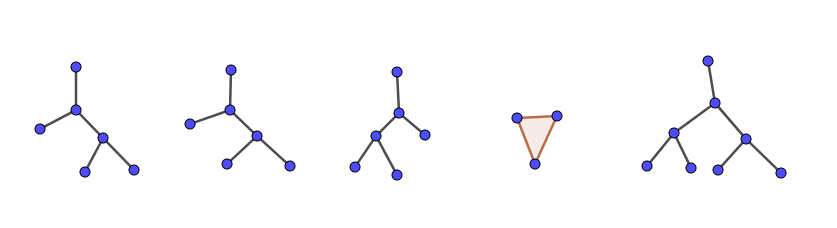

In [11]:
Image("./Images/SP18_3.PNG")

<b>Observe</b>: this can be written as $2T_1 + T_2 \bar{\triangledown} T_3$

<b>Observe</b>: This represents an algebra of MSets. 

<b>Todo</b>: Find a way to do this computationally